In [16]:
from create_db import Person
from engine import Session
import matplotlib.pyplot as plt
from sqlalchemy import func, distinct
plt.ioff()

In [17]:
session = Session()
data = {}

In [18]:
data = session.query(
    func.floor(func.datediff(Person.value_day, Person.birth_date) / 365).label('age'),
    func.count(distinct(Person.pass_num)).label('count'),
    ).group_by('age').all()
salary = session.query(
    Person.pass_num,
    func.avg(Person.salary_amt)).group_by('pass_num').all()
trip = session.query(
    Person.pass_num,
    func.avg(Person.trip_cnt)).group_by('pass_num').all()

In [19]:
salary = list(map(lambda x: float(x[1]), salary))
trip= list(map(lambda x: float(x[1]), trip))

In [20]:
age, count = zip(*data)

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

In [22]:
axes[0].bar(age, count, fc='red', ec='black', alpha=0.8)
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Кол-во человек')
axes[0].set_title('Кол-во человек в разрезе возраста')
axes[1].hist(salary, fc='blue', ec='black', alpha=0.8)
axes[1].set_xlabel('Зарплата')
axes[1].set_ylabel('Кол-во человек')
axes[1].set_title('Кол-во человек в разрезе средней зарплаты')
axes[2].hist(trip, fc='green', ec='black', alpha=0.8)
axes[2].set_xlabel('Кол-во поездок')
axes[2].set_ylabel('Кол-во человек')
axes[2].set_title('Кол-во человек в разрезе среднего кол-ва поездок')

Text(0.5,1,'Кол-во человек в разрезе среднего кол-ва поездок')

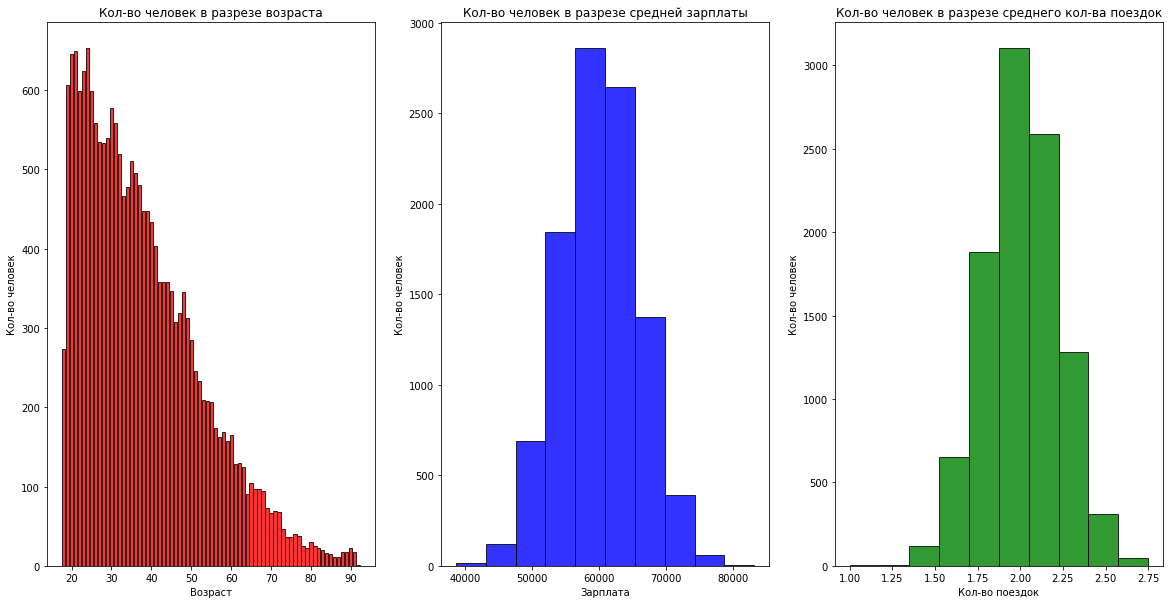

In [23]:
plt.show(fig)

In [24]:
fig.savefig('../screenshots/data.png', format='png', dpi=120)